## Primeiro tratamento de dados

Aqui carregam-se os dois primeiros datasets. O de Paises e depois o de coffee. O de Coffee não é o inicialmente proposto já que esse se revelou mau.
Este também é limitado (tem a UE agrupada o que impede a analise de paises como o nosso) mas é muito mais assertivo.

In [54]:
import pandas as pd

# Load the dataset into a DataFrame
dfCountries = pd.read_csv('Dados/countries of the world.csv')

# Display the first few rows of the DataFrame
dfCountries.head()

dfCoffee = pd.read_csv('Dados/psd_coffee.csv')

# use a pivot table to display the average coffee production for each country and in the columns show the Attribute_Description Column
dfCoffee.pivot_table(index='Country_Name', columns='Attribute_Description', values='Value', aggfunc='mean')


Attribute_Description,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
Country_Name,,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,2067.105263,0.000000,2094.736842,0.000000,0.000000,2094.736842,0.000000,0.000000,0.000000,0.000000,0.000000,2067.631579,27.105263,0.000000,27.631579,2094.736842,2094.736842
Angola,21.475410,879.098361,0.000000,1287.737705,47.901639,1274.344262,879.098361,0.000000,0.000000,913.606557,0.000000,0.000000,892.131148,47.901639,0.000000,0.000000,0.000000,2201.344262,2201.344262
Argentina,0.000000,0.000000,491.315789,0.000000,730.315789,0.000000,0.000000,730.315789,0.000000,0.000000,0.000000,11.105263,0.000000,501.368421,228.947368,0.000000,227.894737,730.315789,730.315789
Australia,0.000000,0.000000,1146.842105,0.000000,1505.000000,0.000000,0.000000,1505.000000,0.000000,0.000000,0.000000,119.210526,0.000000,1266.052632,238.947368,0.000000,238.947368,1505.000000,1505.000000
Benin,0.000000,16.720000,0.000000,0.880000,0.660000,0.880000,16.720000,0.000000,0.000000,17.380000,0.000000,0.000000,17.380000,0.660000,0.000000,0.000000,0.000000,18.260000,18.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,240.344262,7561.311475,82.147541,600.704918,605.442623,681.573770,7915.278689,143.655738,4.819672,8457.934426,71.426230,31.262295,8212.770492,539.426230,66.016393,282.540984,30.245902,9202.295082,9202.295082
Yemen,133.533333,32.200000,0.000000,0.000000,98.333333,0.000000,35.200000,0.000000,0.000000,133.533333,3.000000,0.000000,0.000000,98.333333,0.000000,0.000000,0.000000,133.533333,133.533333
Yemen (Sanaa),61.645161,51.096774,0.000000,0.000000,10.000000,0.000000,51.645161,0.000000,0.000000,61.645161,0.548387,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,61.645161,61.645161


Analisando a pivot table anterior é possivel ver que o que nos interessa é a Domestic Cosumption.

In [55]:

dfCoffee_grouped = dfCoffee[dfCoffee['Attribute_Description'] == 'Domestic Consumption'].groupby('Country_Name').sum()
dfCoffee_avg = dfCoffee.groupby(['Country_Name', 'Attribute_Description'])['Value'].mean().reset_index()
dfCoffee_filtered = dfCoffee_avg[dfCoffee_avg['Attribute_Description'] == 'Domestic Consumption']
#Change the column named Value to Coffee Domestic Consumption
dfCoffee_filtered.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)
dfCoffee_filtered.head()
dfCoffee_filtered.to_csv('DadosTratados/CoffeeTreated.csv', index=False)

#TODO: Congo e brazzaville need work

/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_48661/2681892036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)


## Juntar os dois

Faz-se algum tratamento e depois juntam-se os dataframes

In [56]:
# Rename the 'Country' column in dfCountries to 'Country_Name'
dfCountries.rename(columns={'Country': 'Country_Name'}, inplace=True)

# Ensure consistent formatting for merging
dfCountries['Country_Name'] = dfCountries['Country_Name'].str.strip().str.lower()
dfCoffee_filtered['Country_Name'] = dfCoffee_filtered['Country_Name'].str.strip().str.lower()

# Merge the two DataFrames
dfMerged = pd.merge(dfCountries, dfCoffee_filtered, how='inner', on='Country_Name')

# Display the first few rows of the merged DataFrame
dfMerged.head()
dfMerged.to_csv('DadosTratados/Merged.csv', index=False)

/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_48661/3994400753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered['Country_Name'] = dfCoffee_filtered['Country_Name'].str.strip().str.lower()


## Carregar a felicidade

Carrega-se o dataset de felicidade, trata-se e juntam-se todos os dados

In [57]:
dfHappiness = pd.read_csv('Dados/worldhappinessreport/2019.csv')
#Rename the column named 'Country (region)' to 'Country_Name'
dfHappiness.rename(columns={'Country or region': 'Country_Name'}, inplace=True)
#Ensure consistent formatting for merging
dfHappiness['Country_Name'] = dfHappiness['Country_Name'].str.strip().str.lower()
#Merge the happiness dataset with the merged dataset
dfMergedHappiness = pd.merge(dfMerged, dfHappiness, how='inner', on='Country_Name')
#Remove the column named "Atribute_Description"
dfMergedHappiness.drop(columns='Attribute_Description', inplace=True)
#Show the first few rows of the merged dataset
dfMergedHappiness.head()



,Country_Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Service,Coffee Domestic Consumption,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"0,298",2094.736842,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
1,argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1",...,"0,547",730.315789,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
2,australia,OCEANIA,20264082,7686850,"2,6","0,34","3,98","4,69",29000.0,"100,0",...,"0,7",1505.000000,11,7.228,1.372,1.548,1.036,0.557,0.332,0.290
3,benin,SUB-SAHARAN AFRICA,7862944,112620,"69,8","0,11",0,85,1100.0,"40,9",...,"0,546",0.660000,102,4.883,0.393,0.437,0.397,0.349,0.175,0.082
4,bolivia,LATIN AMER. & CARIB,8989046,1098580,"8,2","0,00","-1,32","53,11",2400.0,"87,2",...,"0,52",42.770492,61,5.779,0.776,1.209,0.706,0.511,0.137,0.064


## Grava-se num ficheiro para poder usar nos dashboards


In [58]:
# Save the merged dataset to a CSV file
dfMergedHappiness.to_csv('DadosTratados/dfDashboards.csv', index=False)

# Usar Transformações

Aqui, dou-lhes um uso expecifico para mostrar os 5 paises mais felizes e menos felizes.

### Os 5 mais felizes

In [59]:
# Use a transformation to create a new DataFrame that contains the average happiness score for each region
dfindexRegionHappiness = dfMergedHappiness.groupby('Region')['Score'].mean().reset_index()
# Rename the 'Score' column to 'Average Happiness Score'
dfindexRegionHappiness.rename(columns={'Score': 'Average Happiness Score'}, inplace=True)
# Order it in descending order
dfindexRegionHappiness = dfindexRegionHappiness.sort_values(by='Average Happiness Score', ascending=False)
# Display the top 5 happiest regions
dfindexRegionHappiness.head()


,Region,Average Happiness Score
9,WESTERN EUROPE,7.517000
7,OCEANIA,7.267500
6,NORTHERN AMERICA,7.085000
3,LATIN AMER. & CARIB,5.924105
2,EASTERN EUROPE,5.517500


### Os mais infelizes

In [60]:
# Display the bottom 5 happiest regions
dfindexRegionHappiness.tail()

,Region,Average Happiness Score
0,ASIA (EX. NEAR EAST),5.296538
1,C.W. OF IND. STATES,5.263000
5,NORTHERN AFRICA,4.861667
4,NEAR EAST,4.553000
8,SUB-SAHARAN AFRICA,4.255700


## Demonstrar os dados graficamente

Aqui faço alguns gráficos que considero interessantes.

### Top 10 consumo de café

<Axes: xlabel='Country_Name'>

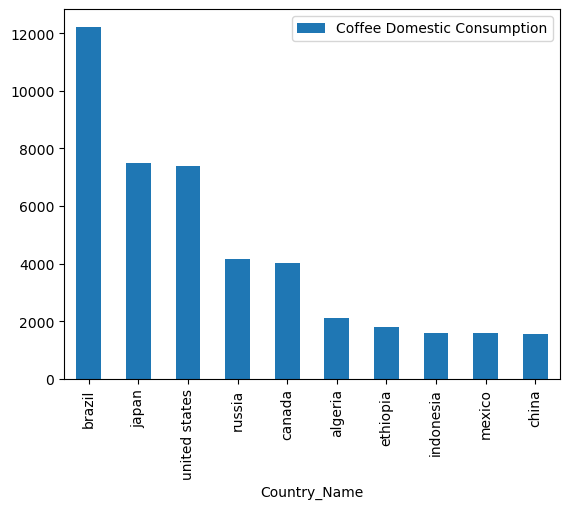

In [61]:
# Show the top 10 countries with the highest coffee consumption
# Show a bar graph
dfMergedHappiness.sort_values('Coffee Domestic Consumption', ascending=False).head(10).plot(x='Country_Name', y='Coffee Domestic Consumption', kind='bar')



### Ainda top 10.. mas para a Europa

(Aqui consegue-se vêr a limitação do dataset)

<Axes: xlabel='Country_Name'>

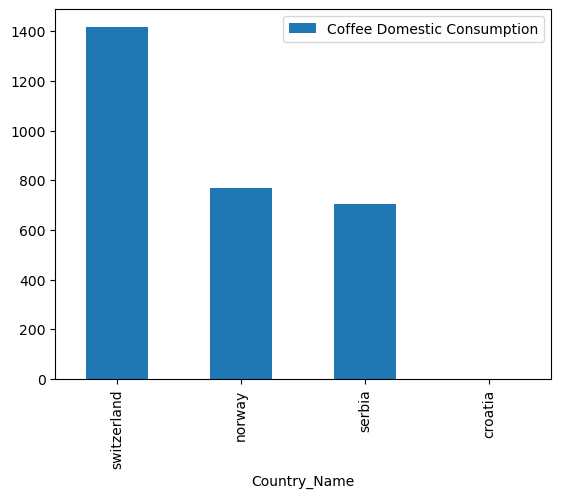

In [62]:
# Show the top 10 countries with the highest coffee consumption where Region is like "EUROPE"
# Show a bar graph
dfMergedHappiness[dfMergedHappiness['Region'].str.contains('EUROPE', case=False)].sort_values('Coffee Domestic Consumption', ascending=False).head(10).plot(x='Country_Name', y='Coffee Domestic Consumption', kind='bar')


### Plot
Para este tipo de dados é o que faz mais sentido.
Neste é visivel que não existe relação entre o consumo de café e a felicidade

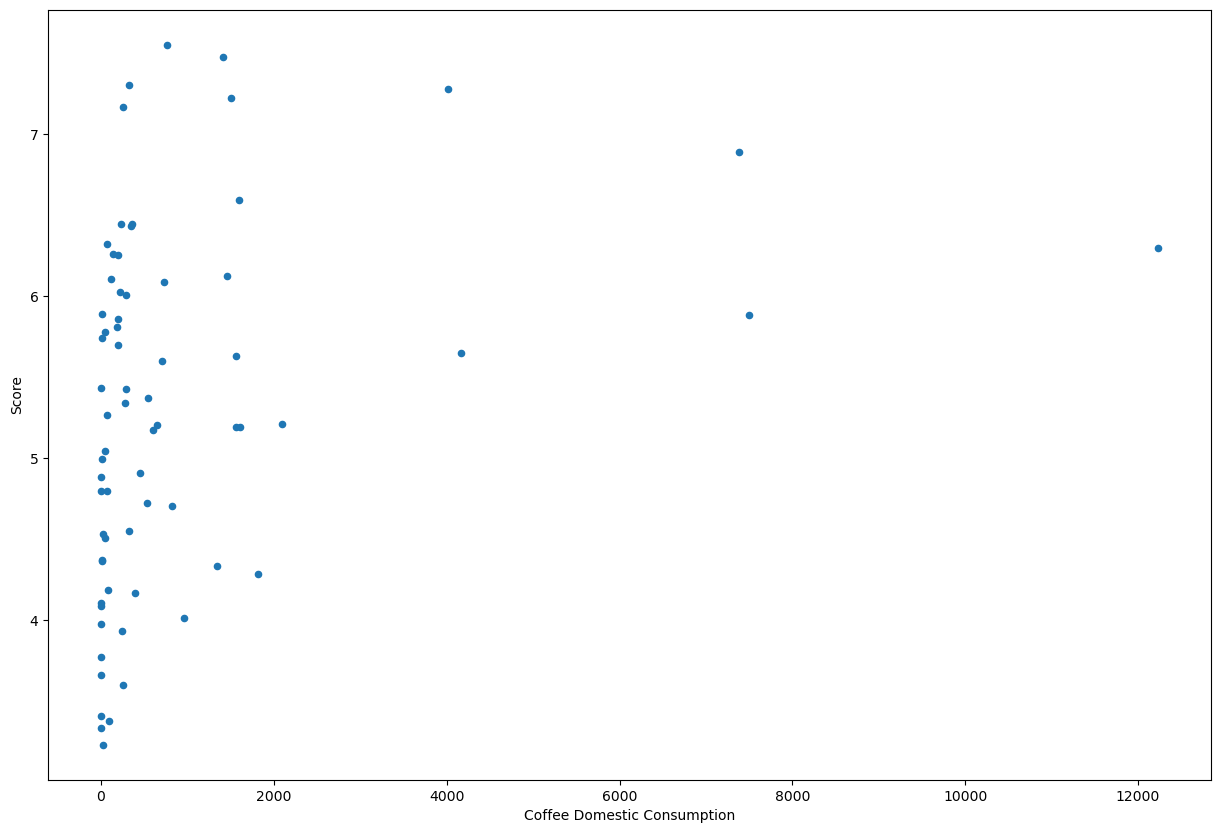

In [63]:
import matplotlib.pyplot as plt
#Compare with a plotter graph both the coffe consumption and the happiness score
dfMergedHappiness.plot(x='Coffee Domestic Consumption', y='Score', kind='scatter', figsize=(15, 10))
plt.show()

### "Brincar" com os dados

### Per capita
Vamos criar uma coluna de consumo per-capita.
Aqui pode-se ver que, se se analisar per capita, o grafico tente mais para a direita mas continua sem se poder vêr uma relação direta.

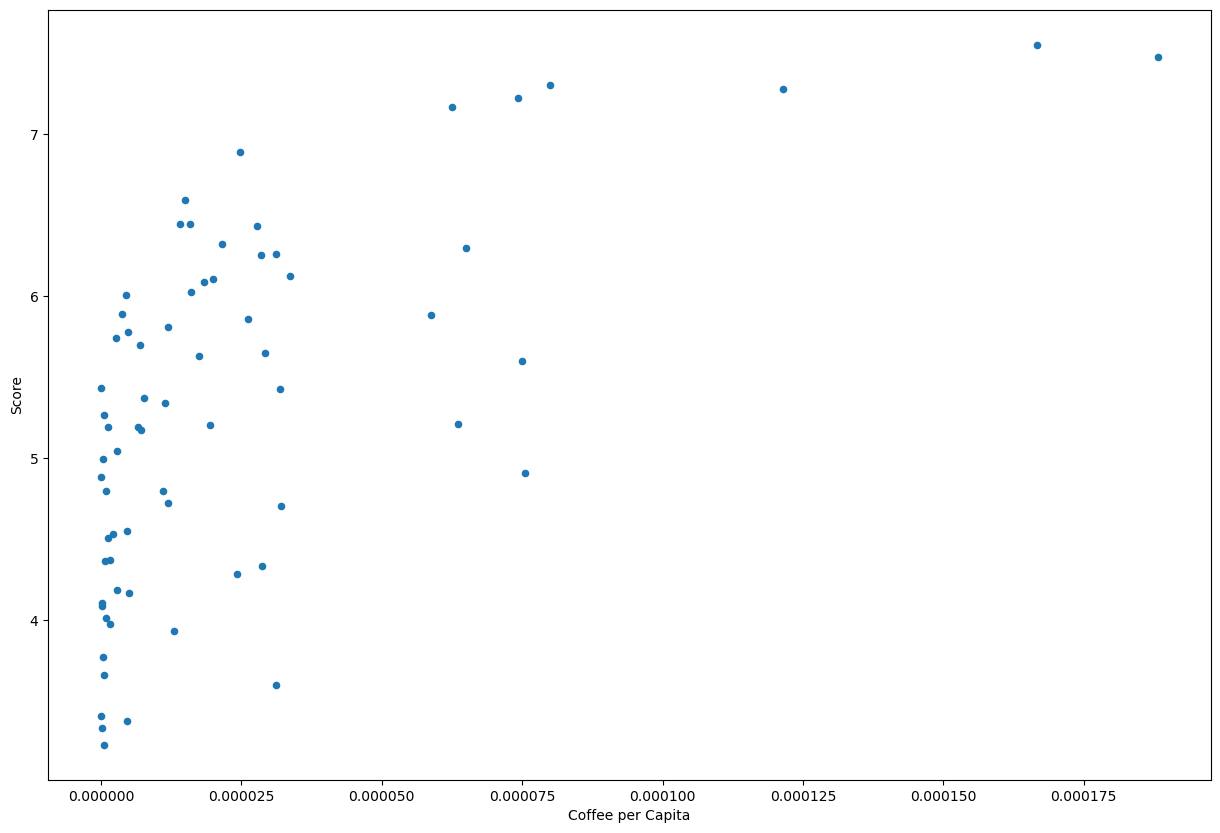

In [64]:
#Create a new column named coffee per capita based on the coffee consumption and the population
dfMergedHappiness['Coffee per Capita'] = dfMergedHappiness['Coffee Domestic Consumption'] / dfMergedHappiness['Population']
#Plot the happiness score against the coffee per capita
dfMergedHappiness.plot(x='Coffee per Capita', y='Score', kind='scatter', figsize=(15, 10))
plt.show()

### Verificar se a àrea tem influencia

In [65]:
#Save the file
dfMergedHappiness.to_csv('DadosTratados/AllMerged.csv', index=False)


In [66]:
# Show a new graph with the consumption vs the area but first convert the area to square meters from square miles
dfMergedHappiness['Area (sq. mi.)'] = pd.to_numeric(dfMergedHappiness['Area (sq. mi.)'], errors='coerce') * 2.58999

# Rename the column to Area (sq. km.)
dfMergedHappiness.rename(columns={'Area (sq. mi.)': 'Area (km2)'}, inplace=True)
dfMergedHappiness['Coffee per Area'] = dfMergedHappiness['Coffee Domestic Consumption'] / dfMergedHappiness['Area (km2)']


### Analise via gráfico de barras

Aqui pode-se ver que, à exceção do Japão, o que salta à vista são os paises mais pequenos!!

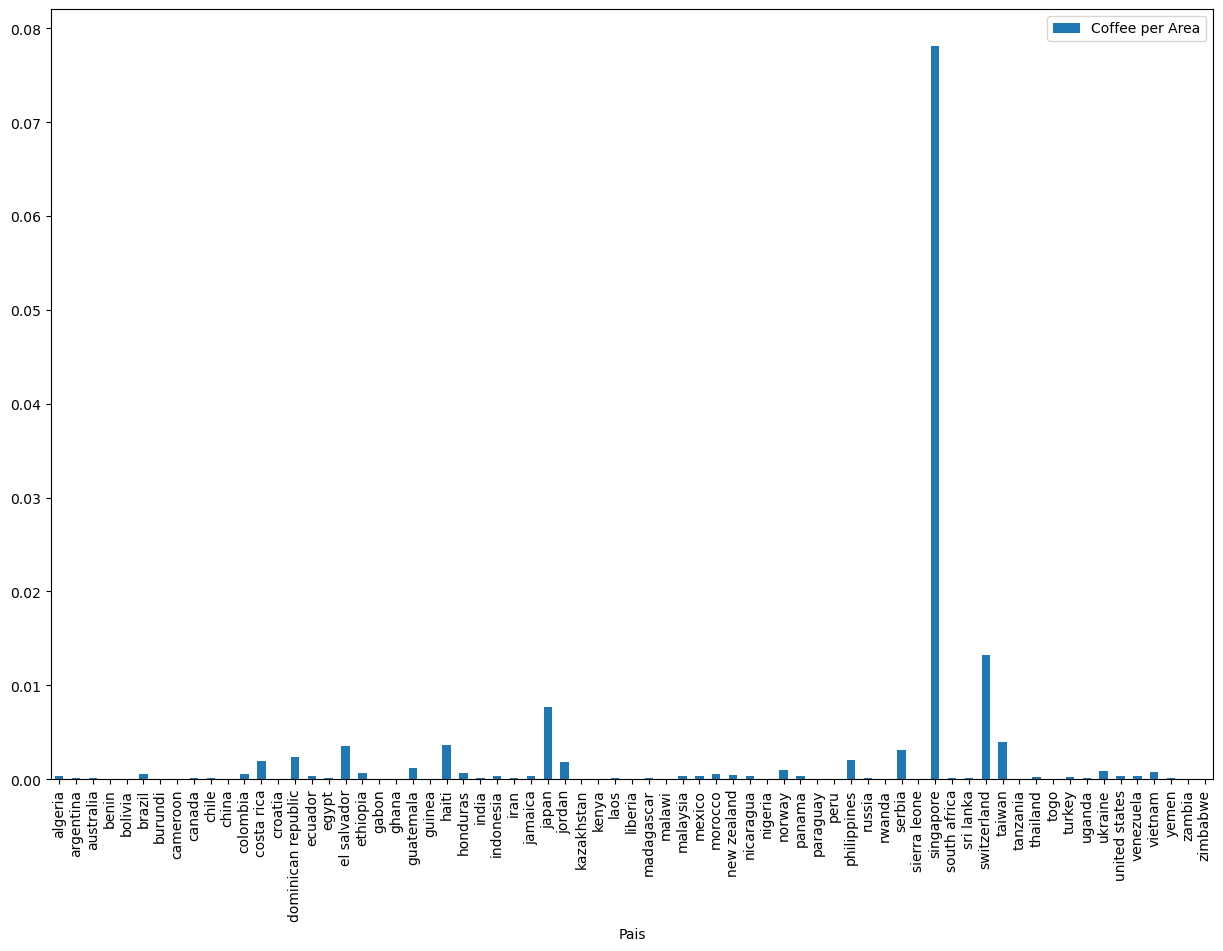

In [67]:

# Show a bar graph with the coffee consumption per area
dfMergedHappiness.plot(x='Country_Name', y='Coffee per Area', kind='bar', figsize=(15, 10))
# Rename x-axis label
plt.xlabel('Pais')
plt.show()
